<a href="https://colab.research.google.com/github/Hyperstrom/Machine_Learning_models/blob/main/LeNet_5_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all libs and Mnist dataset from keras


In [1]:
from keras.datasets import mnist

In [2]:
from keras.utils import to_categorical
from keras.models import *
from keras.layers import *
import matplotlib.pyplot as plt


#Load the Mnist data set


In [22]:
(train_images, train_images_labes) , (test_images,test_images_labes) = mnist.load_data()

In [23]:
print("Train images --")
print(train_images.shape)
print(train_images_labes.shape)

print("Test images --")
print(test_images.shape)
print(test_images_labes.shape)

Train images --
(60000, 28, 28)
(60000,)
Test images --
(10000, 28, 28)
(10000,)


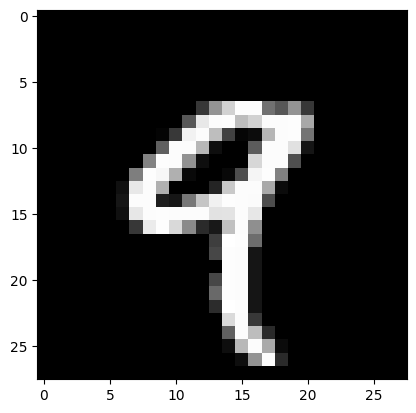

In [24]:
# using plt to show train image

plt.imshow(train_images[4], cmap='gray')
plt.show()


In [25]:
print(train_images[4].shape)

(28, 28)


In [26]:
print(train_images[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [27]:
print(train_images_labes[4])

9


#Encoding that data

In [28]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

print("Before -->")
print(train_images.shape)
print(train_images_labes[4])

train_images_labes = to_categorical(train_images_labes) #convert the label data into categorical data

print("After-->")
print(train_images_labes.shape)
print(train_images_labes[4])

Before -->
(60000, 28, 28, 1)
9
After-->
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#Building the Model

In [48]:
#take the model as Sequentional
model = Sequential()

# Layer-1
#convolution layer-1
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape = (28,28,1)))
#pooling layer-1
model.add(AveragePooling2D(pool_size=(2,2),strides = 2, padding = 'valid'))

# Layer-2
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh',input_shape = (14,14,6)))
# pooling layer-2
model.add(AveragePooling2D(pool_size=(2,2),strides = 2, padding = 'valid'))

#Layer-3
model.add(Flatten())

#Fully connected neural network

# Layer-4
model.add(Dense(120,activation = 'sigmoid'))

# Layer-5
model.add(Dense(84, activation='sigmoid'))

# Layer-6
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [35]:
from keras.utils import plot_model

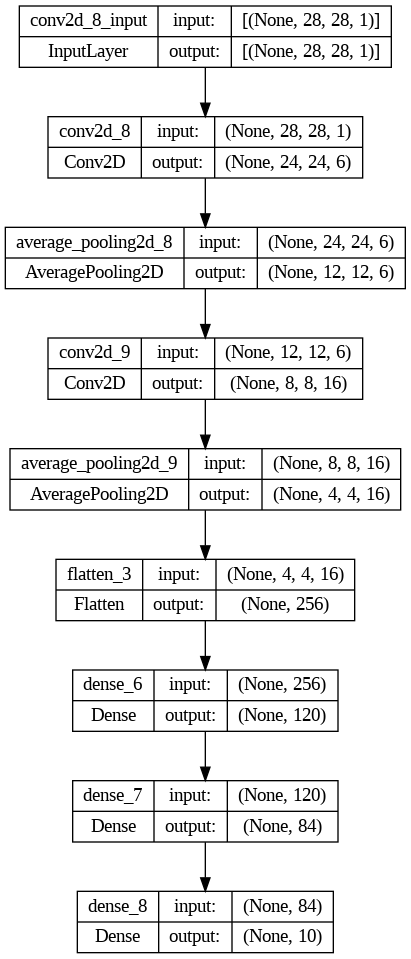

In [44]:
plot_model(model, show_shapes= True)

In [49]:
model.reset_states()


In [50]:

model.fit( train_images, train_images_labes, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 43s 9ms/step - loss: 0.2908 - accuracy: 0.9183 - val_loss: 0.0956 - val_accuracy: 0.9722
Epoch 2/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0828 - accuracy: 0.9745 - val_loss: 0.0752 - val_accuracy: 0.9764
Epoch 3/10
4800/4800 [==============================] - 41s 8ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0738 - val_accuracy: 0.9761
Epoch 4/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 5/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0373 - accuracy: 0.9877 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 6/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0488 - val_accuracy: 0.9847
Epoch 7/10
4800/4800 [==============================] - 41s 9ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0462 - val_ac

#Predict the test_images form Model


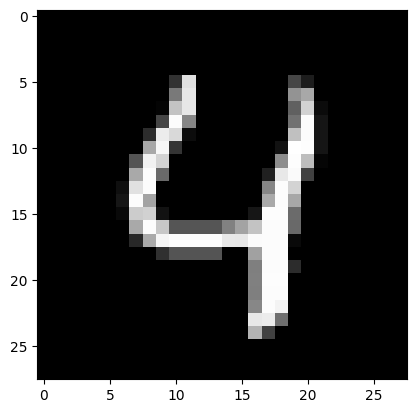

In [52]:
plt.imshow(test_images[4], cmap='gray')
plt.show()

In [54]:
print(test_images.shape)

(10000, 28, 28)


In [55]:
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

print("Before -->")
print(test_images.shape)
print(test_images_labes[4])

test_images_labes = to_categorical(test_images_labes) #convert the label data into categorical data

print("After-->")
print(test_images_labes.shape)
print(test_images_labes[4])

Before -->
(10000, 28, 28, 1)
4
After-->
(10000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [57]:
# check the model prediction with testing data

model.evaluate(test_images,test_images_labes)


313/313 [==============================] - 4s 10ms/step - loss: 0.0435 - accuracy: 0.9858


[0.043521448969841, 0.98580002784729]

In [60]:
#pedict a model output by passing a input to the model

prediction = model.predict(test_images)


313/313 [==============================] - 3s 10ms/step


In [62]:
import numpy as np

In [69]:
n(prediction)

10000

Print the all number from the test_images data set

In [72]:
for i in range(int(len(prediction))):
  print(np.argmax(prediction[i]),end=' ')

7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 6 4 2 4 1 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0 2 0 6 9 9 3 3 3 2 3 9 1 2 6 8 0 9 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 8 9 4 0 6 

check the model for one input

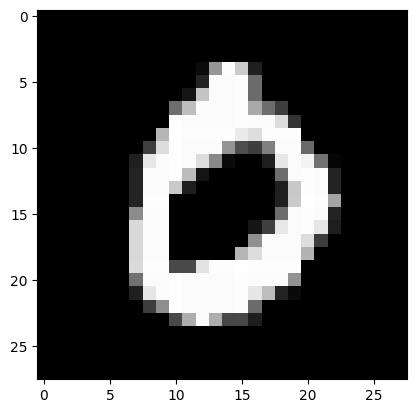

In [73]:
plt.imshow(test_images[3], cmap='gray')
plt.show()

In [74]:
print(np.argmax(prediction[3]))

0


#Test the a custom image

In [95]:
from keras.preprocessing import image
import cv2

In [96]:
img_path = 'test_img.jpg'

In [97]:
img = image.load_img(img_path, target_size=(28, 28))

In [98]:
img = image.img_to_array(img)

In [99]:
img.shape

(28, 28, 3)

In [100]:
import cv2

img = cv2.imread(img_path)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add an additional dimension to represent the single channel
img_array = np.expand_dims(img_gray, axis=-1)

# Print the shape of the resulting image array
print(img_array.shape)

(28, 28, 1)


In [102]:
img = img_gray.reshape(1, 28, 28, 1)

In [103]:
img = img.astype('float32')/255

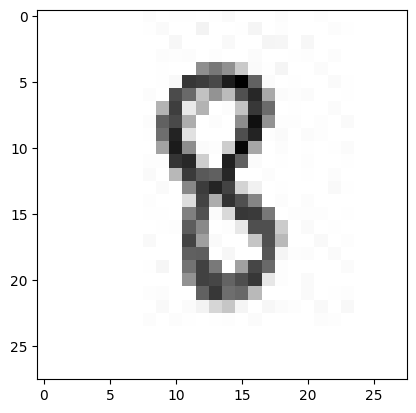

In [106]:
plt.imshow(img_array, cmap='gray')
plt.show()

In [107]:
#predict the image form the image
pred = model.predict(img)
print(np.argmax(pred))

1/1 [==============================] - 0s 26ms/step
8
